# Project: Medical Appointment No Show

## 1. Introduction 
This [dataset](https://www.kaggle.com/joniarroba/noshowappointments) collects information from almost 100k medical appointments in Brazil and is **focused on the question of whether or not patients show up for their appointment.** A number of characteristics about the patient are included in each row.

* PatientId: Identification of a patient
* AppointmentID: Identification of each appointment
* Gender: Male or Female
* DataMarcacaoConsulta: The day of the actuall appointment, when they have to visit the doctor
* DataAgendamento: The day someone called or registered the appointment
* Age: How old is the patient
* Neighbourhood: Where the appointment takes place
* Scholarship: True or False, indicates if the patient is in the Bolsa Familia program
* Hipertension: True or False
* Diabetes: True or False
* Alcoholism: True or False
* Handcap: True or False
* SMS_received: 1 or more messages sent to the patient
* No-show "No" indicates if the patient showed up to their appointment and "Yes" if they didn't show up


In [32]:
# first let's add important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Import data from the file
df = pd.read_csv("KaggleV2-May-2016.csv")

In [33]:
#Check how the data looks like
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [34]:
# Check from which time periods these apointments are from
df.AppointmentDay.min(), df.AppointmentDay.max()

('2016-04-29T00:00:00Z', '2016-06-08T00:00:00Z')

In [35]:
# Check the shape of our data
df.shape

(110527, 14)

In [36]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [37]:
# Check missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [38]:
# Check unique values
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [39]:
# Check numerical attributes
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


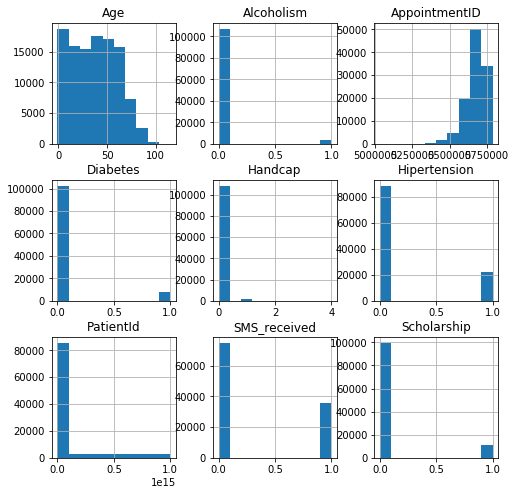

In [40]:
# Observing data through visualization
df.hist(figsize=(8,8));

# Observations
* We have 110,527 rows who are represnting our patients whereas 14 columns are patient's aattributes.
* These appointments are of 2 months from '2016-04-29' to '2016-06-08'.
* Avereage age of the patients is approximately 37.
* 9 percent of the patients does not have a scholarship
* On average patients suffers from, _Hipertension_ 19%, _Diabetes_ 7%, _Alcoholism_ 3% and _handicap_ 2%. 


# Questions
The questions that comes into my mind after my observation so far:

- The most important factor that is influencing the patient to no showing the medical appointment?
- Relation between variables that can lead us to some special kind of people or group?
- Which days or hours influences mostly on patient not showing up for the appointment?
- Does the waiting time influenced on not showing up for the appointment?
- Is there any specific gender who is not showing up for the appointment?


## Data Wrangling

Analyzing data and trying to figure out which values, variables or columns can be fixed. Figuring out missing, weird and duplicated values.


In [41]:
# checking for general data duplicates
df.duplicated().sum()

0

In [42]:
# checking for Patient Id duplicates
df.PatientId.duplicated().sum()

48228

### Patient Id 
This is an important variable, as we can see patients have tried making new appointments as well.

In [43]:
# checking for Appointment ID duplicates
df.AppointmentID.duplicated().sum()

0

In [44]:
# checking all possible values on some columns

print(df.Gender.unique())
print("")
print(sorted(df.Age.unique()))
print("")
print(sorted(df.Neighbourhood.unique()))
print("")
print(df.Scholarship.unique())
print("")
print(df.Hipertension.unique())
print("")
print(df.Diabetes.unique())
print("")
print(df.Alcoholism.unique())
print("")
print(df.Handcap.unique())
print("")
print(df.SMS_received.unique())
print("")
print(df['No-show'].unique())


['F' 'M']

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]

['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO', 'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATOÍRA', 'CENTRO', 'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO', 'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO', 'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE SÃO JOÃO', 'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA', 'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA', 'ILHA DO BOI', 'ILHA DO FRADE', 'ILHA DO PRÍNCIPE', 'ILHAS OCEÂNICAS DE TRINDADE', 'INHANGUETÁ', 'ITARARÉ', 'JABOUR', 

In [29]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Observations after data wrangling

As we can see we can most of the values are in a good shape, means we dont have much to do with these, but still we can fix few things:

- We can fix data types of ScheduledDay and AppointmentDay
- PatientId can be converted into strings
- AppointmentId is not needed
- Handcap values need to have a closer look as you can see [here](https://www.kaggle.com/joniarroba/noshowappointments/discussion/29699#229356). It has a range of values from 0 to 4, which tells us about how many disablities one patient have.
- Removing negative values in age column

## Data Cleaning

We will start from fixing things we have mentioned above in our observations.

In additiont to that we will:
- rename the coulums for fixing typos
- formating Handcap, as we only need to know if someone is Handicapped or not.
- adding new column of waiting time, as it might help us in figuring out, how much this factors effect not showing up for the appointment.


In [23]:
# Removing the record with negative Age
df[df['Age'] < 0].index
df.drop(df[df['Age'] < 0].index, inplace=True)

In [24]:
# Confirming that the data is removed
df[df['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
